### Import needed library

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
import seaborn as sns
import math
from scipy import stats
from scipy.stats import norm
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/climate-change-indicators/climate_change_indicators.csv


In [2]:
df = pd.read_csv("/kaggle/input/climate-change-indicators/climate_change_indicators.csv")

In [3]:
df.sample()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
159,160,Pitcairn Islands,PN,PCN,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.tail()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
220,221,Western Sahara,EH,ESH,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.423,1.401,1.510,1.732,2.204,0.942,1.477,2.069,1.593,1.970
221,222,World,NaN,WLD,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.016,1.053,1.412,1.660,1.429,1.290,1.444,1.711,1.447,1.394
222,223,"Yemen, Rep. of",YE,YEM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,224,Zambia,ZM,ZMB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.790,0.917,1.450,1.401,0.105,0.648,0.855,0.891,0.822,0.686
224,225,Zimbabwe,ZW,ZWE,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.118,0.025,0.970,1.270,0.088,0.453,0.925,0.389,-0.125,-0.490


In [5]:
df.shape

(225, 72)

In [6]:
df.describe()

,ObjectId,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
count,225.000000,188.000000,189.000000,188.000000,188.000000,188.000000,192.000000,191.000000,191.000000,190.000000,...,216.000000,216.000000,216.000000,213.000000,214.000000,213.000000,213.000000,212.000000,213.000000,213.000000
mean,113.000000,0.163053,-0.013476,-0.006043,-0.070059,-0.247027,0.105505,-0.110832,-0.199110,0.157942,...,0.931199,1.114815,1.269773,1.439521,1.280785,1.302113,1.443061,1.552038,1.343531,1.382113
std,65.096083,0.405080,0.341812,0.387348,0.309305,0.270734,0.378423,0.339484,0.270131,0.308540,...,0.321595,0.564903,0.462162,0.401091,0.393999,0.596786,0.467510,0.621930,0.484692,0.669279
min,1.000000,-0.694000,-0.908000,-1.270000,-0.877000,-1.064000,-1.801000,-1.048000,-1.634000,-0.900000,...,0.118000,-0.092000,-0.430000,0.250000,0.017000,0.238000,0.050000,0.229000,-0.425000,-1.305000
25%,57.000000,-0.097000,-0.164000,-0.205500,-0.236500,-0.392500,-0.035750,-0.259500,-0.340000,-0.009000,...,0.743500,0.744000,1.017750,1.147000,1.027500,0.865000,1.169000,1.161750,1.019000,0.878000
50%,113.000000,0.064500,-0.056000,-0.003000,-0.056000,-0.230500,0.098000,-0.146000,-0.187000,0.204000,...,0.897000,0.986500,1.215000,1.446000,1.282000,1.125000,1.412000,1.477000,1.327000,1.315000
75%,169.000000,0.318500,0.114000,0.230500,0.132500,-0.091500,0.277000,0.015000,-0.067000,0.349000,...,1.187500,1.335500,1.520500,1.714000,1.535000,1.834000,1.698000,1.826250,1.629000,1.918000
max,225.000000,1.892000,0.998000,1.202000,1.097000,0.857000,1.151000,1.134000,0.476000,0.939000,...,1.643000,2.704000,2.613000,2.459000,2.493000,2.772000,2.689000,3.691000,2.676000,3.243000


In [7]:
X=df.iloc[:, :-1]
y=df.iloc[:, -1]


In [8]:
X

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.223,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.487,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.147,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.924,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.265,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,221,Western Sahara,EH,ESH,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.344,1.423,1.401,1.510,1.732,2.204,0.942,1.477,2.069,1.593
221,222,World,NaN,WLD,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.074,1.016,1.053,1.412,1.660,1.429,1.290,1.444,1.711,1.447
222,223,"Yemen, Rep. of",YE,YEM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,224,Zambia,ZM,ZMB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.972,0.790,0.917,1.450,1.401,0.105,0.648,0.855,0.891,0.822


In [9]:
y

0      2.012
1      1.518
2      1.688
3      1.256
4      3.243
       ...  
220    1.970
221    1.394
222      NaN
223    0.686
224   -0.490
Name: F2022, Length: 225, dtype: float64

In [10]:
# subsetting
df = df[[
#     'ObjectId', 
    'Country', 
#     'ISO2', 
    'ISO3', 
#     'Indicator', 'Unit', 'Source',
#     'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 
    'F1961', 'F1962',
    'F1963', 'F1964', 'F1965', 'F1966', 'F1967', 'F1968', 'F1969', 'F1970',
    'F1971', 'F1972', 'F1973', 'F1974', 'F1975', 'F1976', 'F1977', 'F1978',
    'F1979', 'F1980', 'F1981', 'F1982', 'F1983', 'F1984', 'F1985', 'F1986',
    'F1987', 'F1988', 'F1989', 'F1990', 'F1991', 'F1992', 'F1993', 'F1994',
    'F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 'F2001', 'F2002',
    'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009', 'F2010',
    'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018',
    'F2019', 'F2020', 'F2021', 'F2022'
]].copy()

In [11]:
from umap import UMAP

columns = [column for column in df.columns if column.startswith('F')]

reducer = UMAP(n_components=2, random_state=2024, transform_seed=2024, verbose=True, n_jobs=1, n_epochs=100)
df[['x', 'y']] = pd.DataFrame(data=reducer.fit_transform(X=df[columns].fillna(value=0)))


2024-03-10 17:53:24.813012: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-10 17:53:24.813172: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-10 17:53:24.973608: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


UMAP(n_epochs=100, n_jobs=1, random_state=2024, transform_seed=2024, verbose=True)
Sun Mar 10 17:53:38 2024 Construct fuzzy simplicial set
Sun Mar 10 17:53:38 2024 Finding Nearest Neighbors
Sun Mar 10 17:53:42 2024 Finished Nearest Neighbor Search
Sun Mar 10 17:53:46 2024 Construct embedding


Epochs completed:   0%|            0/100 [00:00]

	completed  0  /  100 epochs
	completed  10  /  100 epochs
	completed  20  /  100 epochs
	completed  30  /  100 epochs
	completed  40  /  100 epochs
	completed  50  /  100 epochs
	completed  60  /  100 epochs
	completed  70  /  100 epochs
	completed  80  /  100 epochs
	completed  90  /  100 epochs
Sun Mar 10 17:53:47 2024 Finished embedding


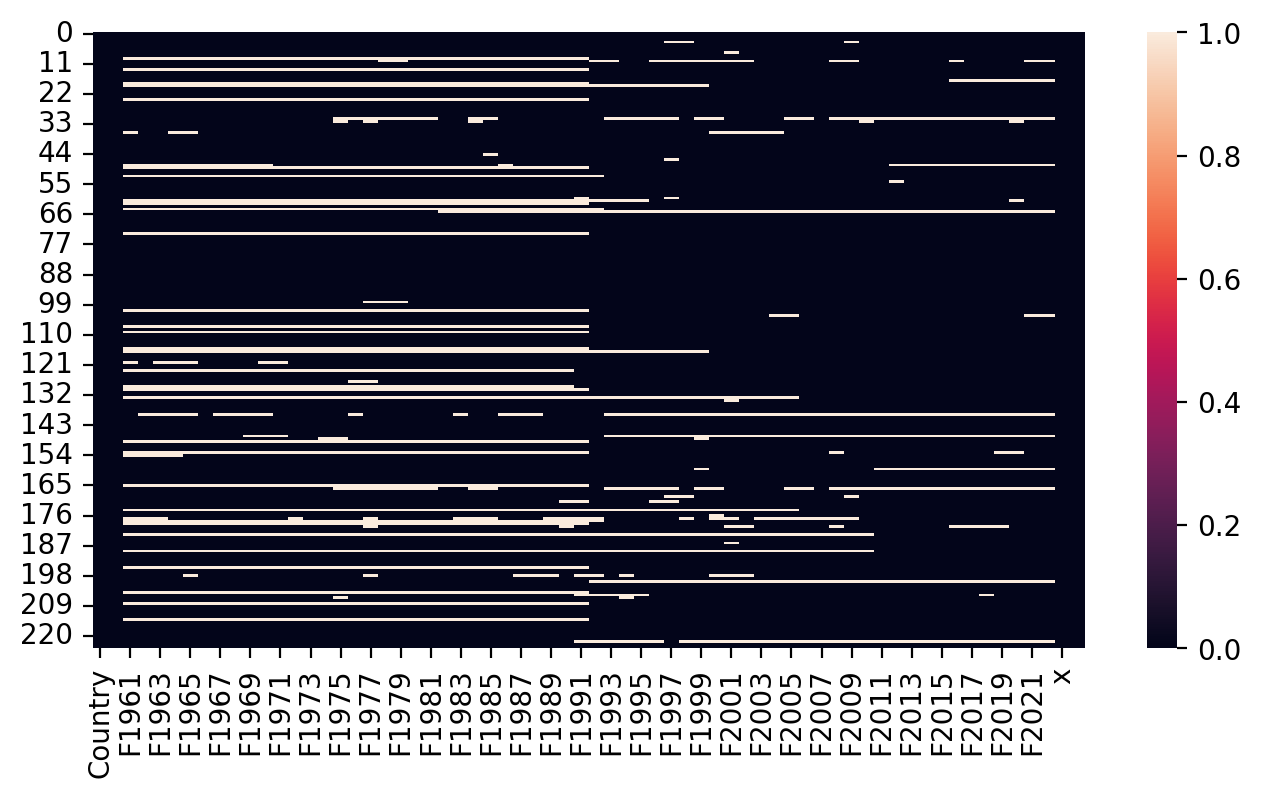

In [12]:
plt.figure(figsize = (8, 4), facecolor = "white")

sns.heatmap(
    df.isnull(), vmin = 0, vmax = 1
)

plt.show()

In [13]:
import pandas as pd
import plotly.express as px

# DATAPATH
file_path = '/kaggle/input/climate-change-indicators/climate_change_indicators.csv'
df = pd.read_csv(file_path)

# MELT THE DATAFRAME TO LONG FORMAT FOR BETTER PLOTTING 
df_melted = pd.melt(df, id_vars=['Country'], var_name='Year', value_name='Temperature')

# BUILD A HILL PLOT 
fig = px.area(df_melted, x='Year', y='Temperature', line_group='Country', color='Country',
              labels={'Temperature': 'Temperature Change', 'Year': 'Year'})

# UPDATELAYOUT FOR BETTER LOOK
fig.update_layout(title='Temperature Change Over the Years',
                  xaxis_title='Year',
                  yaxis_title='Temperature Change',
                  legend_title='Country')


fig.show()

In [14]:
import pandas as pd
import plotly.express as px

# DATAPATH
file_path = '/kaggle/input/climate-change-indicators/climate_change_indicators.csv'
df = pd.read_csv(file_path)



# MELT THE DATAFRAME TO LONG FORMAT FOR BETTER PLOTTING 
df_melted = pd.melt(df, id_vars=['Country'], var_name='Year', value_name='Temperature')

# EXTRACT THE YEAR AND HANDLE NAN VALUES
df_melted['Year'] = df_melted['Year'].str.extract('(\d+)').astype(float)
df_melted['Year'] = df_melted['Year'].fillna(0)  # Replace NaN with 0
df_melted['Year'] = df_melted['Year'].astype(int)

# FILTER DATA FOR THE YEARS 2010 TO PRESENT 
df_filtered = df_melted[df_melted['Year'] >= 2010]

# BUILD A FOREST PLOT 
fig = px.bar(df_filtered, x='Temperature', y='Country', orientation='h', color='Temperature',
             labels={'Temperature': 'Temperature Change', 'Country': 'Country'})


fig.update_layout(title='Temperature Change by Country (2010 to Present)',
                  xaxis_title='Temperature Change',
                  yaxis_title='Country')


fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

